<a href="https://colab.research.google.com/github/bereacs/l01-greedy-tsp-ACBerea/blob/master/L01_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L01: Implementing Greedy TSP](https://docs.google.com/document/d/1JA_CWBXPN6whvJAemnJLvtYJ3Pbk84dTUolWO_QqosA/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Your Name: Andrew Carnes

**SUMMARY**: A brief summary description of the design and implementation, including how much your initial design plan evolved, the final result you achieved and the amount of time you spent as a programmer or programmers in accomplishing these results. This should be no more than two paragraphs.

The amount of time this took was around 6 to 8 hours, working at a slow to moderate pace for large chunks of time. My plan was to figure out each function sequentially and work on it in short bursts across the week it was assigned. This did not go as planned, as I failed to account for homework and other responsabilites from other classes. This caused long amounts of time for work with lots of issues appearing. Code-wise, I used the abstract greedy algorithm provided in the lab document as a base function. I would look to it to help me determine how other functions would work. This helped on all functions, barring the extractData function. I should have had a better plan going into this assignment. In the future, I plan to organize better and conceptualize what I will need for each function.

**PERSONNEL**: A description of who you worked with and on what sections.  It is expected that all collaboration is done as pair programming together. Also, note these collaborations in the code section itself.

I did not work with others, but did use multiple sources to help me through the project. Below are the sources:


**CHALLENGES**: Descriptions of the largest challenges you overcame and what made them challenging.

The hardest challenges mainly came in the extractData function and the getRoute function. For extractData, I had limited knowledge of working directly with files in programs, so I had to take a step back and do some research on the concept of iterating through one and extracting and remapping data. The getRoute function's while loop forced me to constantly reconsider how it works. The minDist variable and its comparative nature were not something I understood that well at first, upon initially looking it up. Eventually, I figured out how to work with it. The function for the docstring also gave me some hassle with the formatting, but that was corrected by looking up how formal formatting worked.

**INNOVATIONS**: Any innovations that were not specifically required by the assignment. These are not required, but should be highlighted if included.

I reworked the file input to allow for both of the given text files to be implemented in order to prove that my code could work with both files. I also added a function for the docstring requirement, which would print the docstring after the graph.

**TESTING**: Describe how you tested this work.

Testing mostly came in the form of trial and error. I compared the expected results to the actual result and worked from there. I would make minor debug lines to test certain functions.

**ERRORS**: A list in bulleted form of all known errors and deficiencies.

* Cost is not listed for comparison purposes.
* The input code does not account for putting input aside from 1 or 2, which causes the program not to work correctly and output 2 when any number baring 1 is input.
* If a file is not formatted the same way as the current files used or uses strings as opposed to floats or integers, the code will not run properly.

**COMMENTS**: A paragraph or so of your own comments on and reactions to the Lab.

This lab was fairly challenging, as I haven't worked with Python or code in general for a while. It was a good refresher of basic concepts while introducing some new concepts like file iteration or mapping. I struggled more than I expected with the getRoute function. It had expanded from the simple idea of putting nVisits values into visits to implementing a minimum distance that would compare the current nodes distance to the other nodes around it and decide the shortest distance between the calculated distances. Still, these struggles were beneficial in improving my understanding of the assignment and of greedy algorithms in general.

## Import Libraries

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen

### Read data

In [11]:
option1 = urlopen("http://cs.berea.edu/courses/csc445/data/tsp-small.txt").read().decode('ASCII')
option2 = urlopen("https://cs.berea.edu/courses/csc445/data/tsp-48.txt").read().decode('ASCII')
choice = input("For option 1, type 1. For option 2, type 2. ")
if choice == "1":
  tspdata = option1
else:
  tspdata = option2
print(tspdata)

For option 1, type 1. For option 2, type 2. 2
48
6734 1453
2233 10
5530 1424
401 841
3082 1644
7608 4458
7573 3716
7265 1268
6898 1885
1112 2049
5468 2606
5989 2873
4706 2674
4612 2035
6347 2683
6107 669
7611 5184
7462 3590
7732 4723
5900 3561
4483 3369
6101 1110
5199 2182
1633 2809
4307 2322
675 1006
7555 4819
7541 3981
3177 756
7352 4506
7545 2801
3245 3305
6426 3173
4608 1198
23 2216
7248 3779
7762 4595
7392 2244
3484 2829
6271 2135
4985 140
1916 1569
7280 4899
7509 3239
10 2676
6807 2993
5185 3258
3023 1942



## TSP Class

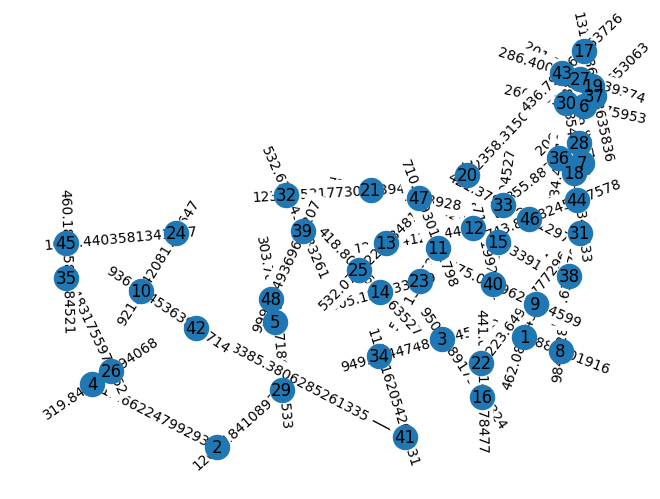

"""
48
1916 1569
1112 2049
1633 2809
10 2676
23 2216
675 1006
401 841
2233 10
3177 756
3082 1644
3023 1942
3484 2829
3245 3305
4483 3369
5185 3258
5468 2606
5199 2182
4612 2035
4307 2322
4706 2674
5989 2873
6347 2683
6426 3173
6807 2993
7509 3239
7462 3590
7573 3716
7541 3981
7248 3779
7352 4506
7608 4458
7762 4595
7732 4723
7555 4819
7280 4899
7611 5184
5900 3561
6271 2135
6898 1885
6734 1453
7265 1268
7392 2244
7545 2801
6101 1110
6107 669
5530 1424
4608 1198
4985 140
1916 1569
"""


In [12]:
"""

Given certain input, it uses the greedy algorithm to plot a graph and output a file of the solution path
"""

class TSP:

    def __init__(self):
        """ TSP class containing data needed for networkx graph creation, file reading and file writing.
            Creates a graph for the traveling salesperon problem using the greedy algorithm
        """
        # The amount of nodes that are with the graph/file.
        self.dimension = None
        # A dictionary that holds the key-value pairs of the nodes.
        self.nodeData = []
        # For creating and manipulating the graph.
        self.graph = nx.DiGraph()
        # The location of each node (I think it's a key value pair)
        self.coords = {}
        # The list of places
        self.places = []
        #The route for the greedy TSP solution.
        self.route = []

    def extractData(self, inputFile=""):
        """
        Itterate through the input file and append each coordinate into the node list.
        Keyword Arguments:
            inputFile {str} -- a string for the file name (default: {""})
        """
        # Set inputData to a local variable.
        inputData = inputFile
        # Read the file
        if "\n" in inputData:
          lines = inputData.split("\n")
        else:
          with open(inputFile, "r") as id:
            lines = id.readlines()

        # Set the dimensions of the node
        self.dimension = int(lines[0].strip())
        # Append Each Coordinate into the node list (Make sure to exclude line 0 as it is the total number of nodes).
        for nodeId, line in enumerate(lines[1:], start=1):
          # If line is not malformed, then convert the line into an into and append the nodeId, x and y values to to the nodeData list.
          if line.strip():
            x, y = map(int, line.strip().split())
            self.nodeData.append((nodeId, x, y))

    def setUpCoords(self):
        """ Puts the coordinates for each node into a dictionary as a tuple with the node as the key """
        # Initialize dictionary
        coordsDict = {}
        # append nodeData as a tuple with each node as the key (nodeId) and coords as the value.
        for val in self.nodeData:
            coordsDict[val[0]] = (val[1], val[2])
        self.coords = coordsDict


    def calculateDistance(self, a, b):
        """calculates & returns the distance between points a and b
        Arguments:
            a {[tuple]} -- tuple of numbers for the x and y coordinate of a node
            b {[tuple]} -- tuple of numbers for the x and y coordinate of a node
        Returns:
            [float] -- the distance between the two points using the distance formula
        """
        # Initialize a and b. Use placeholder coordinates based on self.coords.
        a = (a[0], a[1])
        b = (b[0], b[1])
        # Distance Formula
        return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

    def getRoute(self, current, visits=[], nVisits=[], needList=True):
        """Makes a list of the nodes to be visited, in order, according to the greedy alogorithm for the TSP
        Arguments:
            current {int} -- the node to start at, not a list index
        Keyword Arguments:
            visits {list} -- list of places already visited (default: {[]})
            nVisits {list} -- list of places not visited (default: {[]})
            needList {bool} -- boolean deciding if the list of places not visited needs to be filled (default: {True})
        Returns:
            [list] -- list of places to visit in order
        """

        # Initalize visits and nVisits
        if visits is None:
            visits = []
        if nVisits is None:
            nVisits = list(self.graph.nodes())

        # If needList is true, then set nVists to the listPlaces. This will give nVisits all of the locations it needs.
        if needList:
            nVisits = self.listPlaces()
            visits = []

        # Add current to the visited list and remove current from the nVisited list.
        if current in nVisits:
            visits.append(current)
            nVisits.remove(current)

        # A while function that removes from nVisits and adds to visits so long as nVisits is not empty.
        while nVisits:
            currentCoords = self.coords[current]
            # Create an unrestrcted value for minDist to compare.
            minDist = float('inf')
            nearestNode = None
            # Compare the distance of the current and next nodes to see which distance is the shortest. (Do so until the visit list is filled.)
            for node in nVisits:
                # Aquire the nodes coordinates.
                nodeCoords = self.coords[node]
                # Determine the distance of the current and next node according to the distance formula.
                distance = self.calculateDistance(currentCoords, nodeCoords)
                # Check if the distance is less than the current minDist.
                if distance < minDist:
                    minDist = distance
                    nearestNode = node
            # Append the nearest node to the visits list.
            visits.append(nearestNode)
            # Remove the nearest node from the nVisits list.
            nVisits.remove(nearestNode)
            # Set the nearest node to the current node.
            current = nearestNode

        return visits

    def beGreedy(self, start):
        """ puts together the greedy algorithm. Gets the route order and adds the starting place to the end of the route
        Arguments:
            start -- the starting node for the greedy algorithm
        Returns:
            [list] -- list of places to visit in order
            [float] -- cost of the route
        """
        bestTourSoFar = None
        costOfBestTourSoFar = float('inf')
        for start in self.listPlaces():
          # Get the greedy route from the starting city
            tour = self.getRoute(start)
            tour.append(start)
            # Initalize the cost.
            cost = 0
            # Determine the cost between each different tour and compare them.
            for i in range(len(tour)-1):
                cost += self.calculateDistance(self.coords[tour[i]], self.coords[tour[i+1]])
            # Comparison
            if cost < costOfBestTourSoFar:
                bestTourSoFar = tour
                costOfBestTourSoFar = cost
        # Make sure that the best route is applied to self.route
        self.route = bestTourSoFar
        return bestTourSoFar, costOfBestTourSoFar

    def listPlaces(self):
        """makes a list of all the nodes/places from the dictionary
        Returns:
            [list] -- list of all the nodes/places
        """
        # Initalize List.
        placesList = []
        # Set the identifiers for each coordinate pair of each node to the placesList[].
        for keys in self.coords:
            placesList.append(keys)
        return placesList

    def cleanUpList(self, visited, notVisited):
        """removes items in visited from notVisited
        Arguments:
            visited {list}
            notVisited {list}
        Returns:
            [list] -- a list of notVisited - visited
        """
        # Removes items in visited from the nVisted list as they have now been visited.
        for item in visited:
            if item in notVisited:
                notVisited.remove(item)
        return notVisited

    def addNodes(self):
        """Adds nodes to the networkx graph.
        """
        # Takes the nodeData and makes all of it into a node for the graph to map.
        for everything in self.nodeData:
            node = everything[0]
            self.graph.add_node(node, pos=self.coords[node])

    def addEdges(self):
        """Adds graphs to the networkx graph.
        """
        # Initalize x
        x = 0
        # While x is less than the lenght of self.route - 1, add an edge between two nodes and set the edge's weight to be the distance between the two points.
        while x < len(self.route)-1:
            self.graph.add_edge(self.route[x], self.route[x+1],
                                weight=self.calculateDistance(self.coords[self.route[x]], self.coords[self.route[x+1]]))
            x += 1

    def showGraph(self):
        """Uses the imported libraries to display the graph.
        """
        # get labels and coordinates for the graph
        coords = nx.get_node_attributes(self.graph, 'pos')
        labels = nx.get_edge_attributes(self.graph, 'weight')
        # draw nodes in their coordinates
        nx.draw(self.graph, coords)
        nx.draw_networkx_labels(self.graph, coords)
        # draw edges with their weights
        nx.draw_networkx_edge_labels(self.graph, coords, edge_labels=labels)
        plt.show()

def tourResultsDocstring(self):
  """Creates a docstring based on the tour route of the graph and assists in displaying the results.
  Returns:
      [str] -- a string of the docstring with the route of the graph.
  """
  # Creates the docstring formating.
  docstring = '"""'
  # Uses self.dimension to ensure that only unique visits are counted in the node total, but not excluded from the results.
  route_lines = [str((self.dimension))]
  # Gets the x and y positions of each corrdinate for each node and adds it to the route_lines string.
  for node in self.route:
    x, y = self.coords[node]
    # Formates and appends the x and y values of each coordinate to mimic the appearance of the txt files.
    route_lines.append(f"{x} {y}")

  return docstring + "\n" + "\n".join(route_lines) + "\n" + docstring


def main():
  """Runs the main program.
  """
  tsp = TSP()

  tsp.extractData(tspdata)
  tsp.setUpCoords()
  tsp.addNodes()
  tsp.beGreedy(1)
  tsp.addEdges()
  tsp.showGraph()
  print(tourResultsDocstring(tsp))

main()